In [1]:
import numpy as np #Import Python Library (This is where the data is stored and pulled from the csv)
import pandas as pd # Import software library (This is a software library written for python) This library is used for data manipulation and analysis
import matplotlib.pyplot as plt #Import plotting library (This is used to display graphical data)
import scipy.stats as stats #Import python library (This is used for scientific computations)

In [2]:
data0 = np.genfromtxt('Geneva Ionomics_Y_Spec_as_int.csv',delimiter = ',', skip_header = 1) # This generates data from the csv text
data0 = pd.DataFrame(data0) # This arranges the csv data into an object that pandas can use
data = data0.drop(data0.columns[0:2],axis = 1) # This removes columns one and two which are the plant species and plant number,these will be added back in the final step
plt.rcParams['figure.figsize'] = (20,10) # This sets the parameters for the size of the figure

In [7]:
data.loc[189,] = np.nan #this removes indv 588395

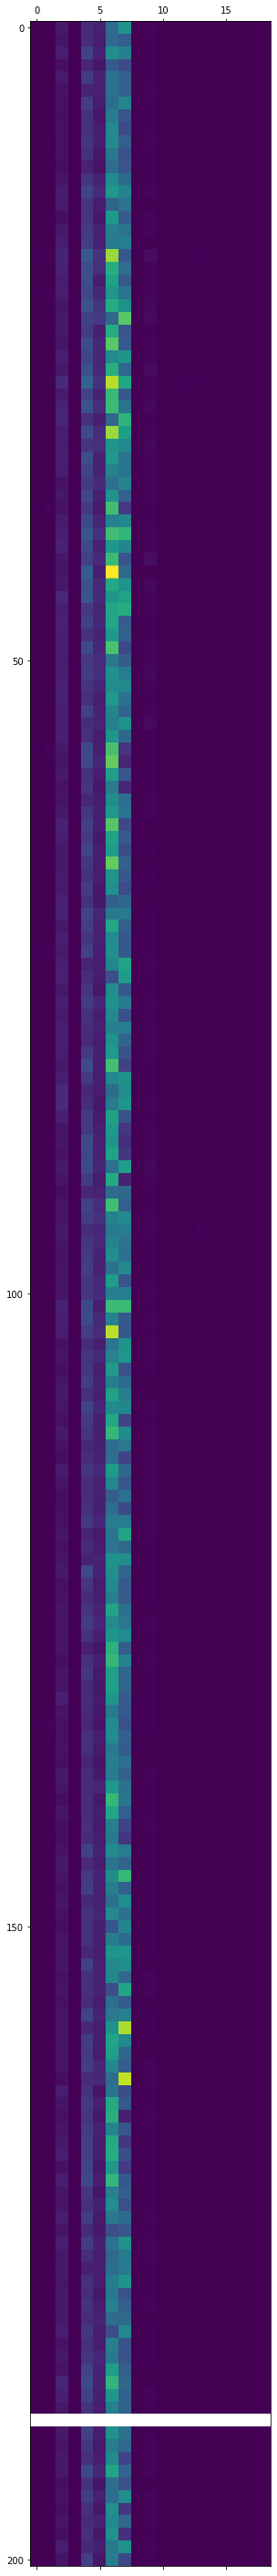

In [10]:
plt.figure(figsize=(5,50)) # This sets the parameters of the following figure which is a heatmap
plt.matshow(data,fignum =1) # This shows the graphic of the heatmap

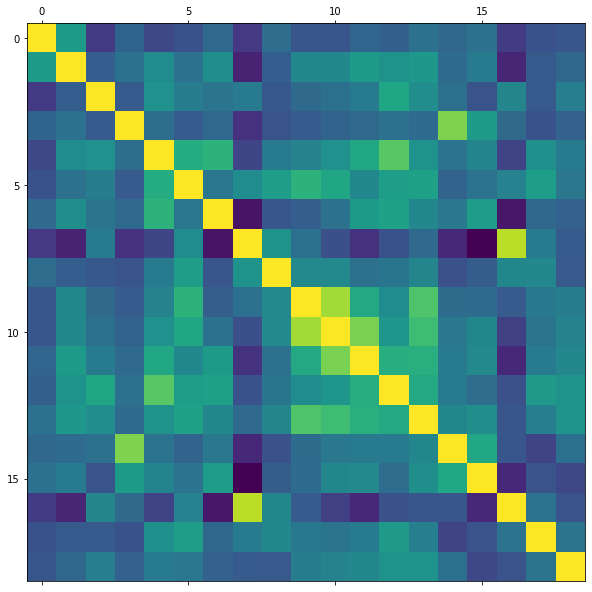

In [11]:
plt.matshow(data.corr()) # This creates the correlation matrix shown below

In [12]:
z = pd.DataFrame(np.arange(4221).reshape(201,21)) #This creates a dummy dataframe for our z value
z = z.astype('float32') #Float is used when storing data with decimal points to keep it precise 
z.drop(z.columns[0:2],axis = 1, inplace = True ) #This drops two columns in our dummy dataframe

In [13]:
for x in range(2,(data.shape[1]+2)): #This gives the dimensions of the array along the x axis
    mean = data[x].mean() #This gives the average of one column of data on the x axis
    stdev = data[x].std() #This gives the standard deviation of one column of the the x axis
    print(x,"m: ",mean,"s: ",stdev) #This prints the mean and standard deviation of the individual columns
    for y in range(data.shape[0]): #This gives the dimension of the array along the y axis
        zscore = (data[x][y] - mean)/stdev #This is the equation that gives us the z score
        z[x][y] = zscore #Assigning the name zscore to the value obtained from the equation
        if data[x][y] < 0: #If the data obtained is less than zero
            z[x][y] = "NaN" #Then it is not treated as a number
z

2 m:  76.5097228579 s:  22.114809514715475
3 m:  71.01984355160006 s:  50.08829977811579
4 m:  1834.6247870219997 s:  511.15596117670714
5 m:  11.037879917984998 s:  17.85857400551597
6 m:  4678.164933444998 s:  1193.2960587560651
7 m:  2586.71270189 s:  574.8770805219951
8 m:  14037.978323480007 s:  3585.130085944025
9 m:  10082.231290220001 s:  3803.900048599225
10 m:  58.89266403389999 s:  21.105137734964668
11 m:  342.50351752899996 s:  127.82546451845039
12 m:  0.14275976508 s:  0.06400909795938219
13 m:  0.8168323828050005 s:  1.0283263539123384
14 m:  54.01915552274999 s:  32.89301316464438
15 m:  83.12248350169999 s:  32.876796450760715
16 m:  0.012250293784999994 s:  0.014624553883070383
17 m:  2.8152597739800016 s:  1.9955348013406053
18 m:  11.923999403419998 s:  5.402282876821493
19 m:  0.39760332674500026 s:  0.39287726628954683
20 m:  0.02953669140500001 s:  0.016457749793691884


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.692703,0.168027,0.152836,-0.288678,-1.095365,-0.020884,-1.143003,1.152545,0.939114,0.750634,0.620880,-0.230813,-0.791538,-0.143229,-0.387373,1.025765,1.937641,0.040497,-0.377792
1,-0.827667,-0.606275,-0.523758,-0.290109,-0.950379,-0.690758,-1.223028,-0.486785,-0.225009,-0.831531,-0.802292,-0.556175,-0.913118,-0.857729,-0.219521,-0.050295,0.351722,-0.238037,-0.520947
2,-0.570128,-0.267203,0.860643,-0.236229,0.684828,0.048733,-0.019548,0.607897,-0.172612,-0.647862,-0.873699,-0.289340,-0.391134,-0.746648,-0.509223,-0.177273,0.474729,0.009420,2.368583
3,-0.165959,0.030816,-1.260347,-0.332969,-1.340899,-1.427680,-1.690195,-1.020385,-0.801928,-0.182517,-0.485446,-0.564767,-1.187771,-0.376403,-0.217123,-0.123098,-1.034349,-0.557028,-0.827251
4,-0.436770,-0.728947,0.467089,-0.169339,0.307751,0.440776,-0.979407,-0.360694,-0.409218,-0.100584,-0.164521,-0.317712,0.456289,-0.260382,0.329508,-0.323697,-0.523073,-0.753630,-0.282677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.557100,-0.142297,-1.448198,0.007615,-0.603612,-1.162560,0.049623,-1.493862,-0.371763,0.606472,0.733198,-0.393828,-0.293745,-0.429965,-0.137081,-0.559680,-1.578883,0.773274,-0.650069
197,-0.884313,-0.314623,-0.699495,-0.056212,-0.965704,0.331843,-0.161853,-0.201515,-0.196228,0.723153,0.422013,-0.273255,-0.869014,0.928448,-0.239090,-0.855539,-0.186144,-0.778948,0.392007
198,0.757204,-0.201087,-1.322406,-0.113024,-0.732842,-1.263402,0.050252,-1.650784,-0.286116,-0.223849,-0.219781,-0.197577,0.103511,-0.469201,-0.406966,-0.546216,-1.663374,0.422181,-0.230117
199,1.637992,0.923608,1.066253,0.072003,-1.155246,-0.104672,-0.715301,1.130958,0.756895,1.581965,0.841633,-0.216884,-0.473968,2.070200,0.296275,-0.792602,1.312367,-0.569446,2.995776


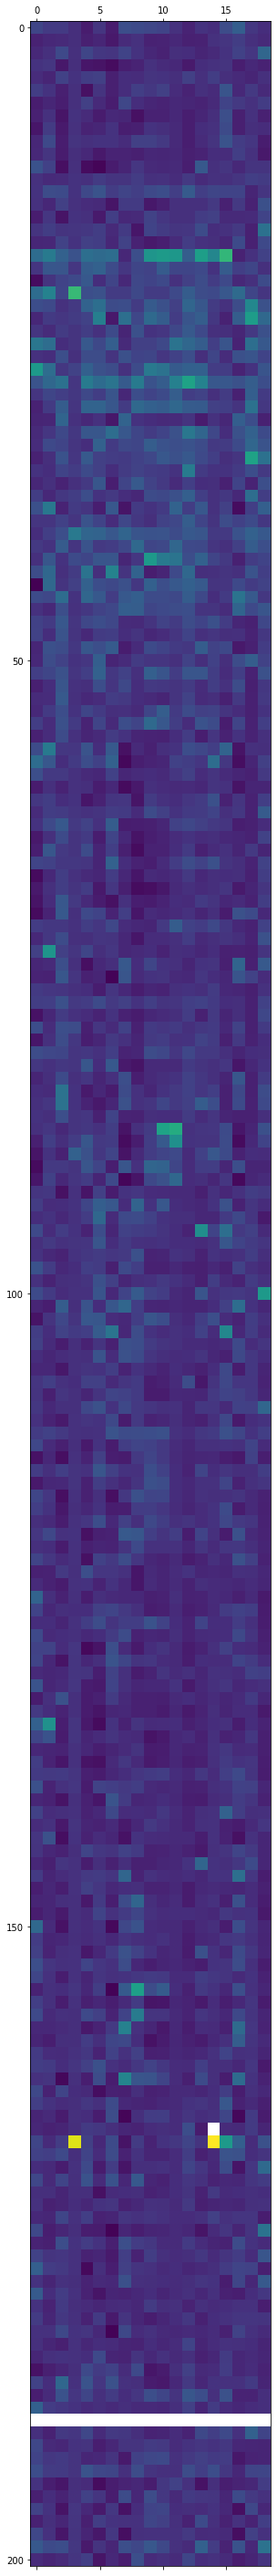

In [14]:
plt.figure(figsize=(5,50)) #This sets the figure size
plt.matshow(z,fignum =1) #This shows the graphic of the heatmap

That indv. is pretty messed up. Remove it?

In [15]:
for x in range(2,(z.shape[1]+2)): # counts through columns
    print(x,"k: ", z[x].kurt(),"s: ", z[x].skew(),"v: ",z[x].var()) #This prints the kutosis,skew, and variance
    if z[x].kurt() > 40: #If the kurtosis is below 40 there will be no checkfor outliers
        cutoff = z[x].quantile(.999) #This means that the cutoff value will be 99.9percent
        for y in range(z.shape[0]): #counts through rows
            if z[x][y] > cutoff: #If the z value is greater than the cutoff number
                z[x][y] = 'NaN' #Then it is treated as not a number
z

2 k:  3.7357817 s:  1.2216779 v:  1.0
3 k:  7.7295218 s:  2.5418098 v:  1.0000007152557373
4 k:  0.19853267 s:  0.6506505 v:  1.0000001192092896
5 k:  84.72392 s:  8.7054205 v:  1.0000001192092896
6 k:  0.43238467 s:  0.741152 v:  1.0000004768371582
7 k:  0.7479718 s:  0.8280226 v:  1.0000003576278687
8 k:  1.3986546 s:  0.8259559 v:  0.9999995231628418
9 k:  1.702297 s:  0.9165258 v:  1.000000238418579
10 k:  5.3455024 s:  1.6237017 v:  1.0000003576278687
11 k:  6.436174 s:  1.896619 v:  1.0000001192092896
12 k:  9.079512 s:  2.3334281 v:  1.0000001192092896
13 k:  14.173334 s:  3.4400163 v:  0.9999998211860657
14 k:  5.6148777 s:  1.8352714 v:  0.9999997615814209
15 k:  6.944126 s:  2.0787778 v:  1.0000003576278687
16 k:  92.56434 s:  8.459709 v:  1.0012162923812866
17 k:  15.769717 s:  3.1237483 v:  1.0
18 k:  0.29288965 s:  0.68904054 v:  1.0
19 k:  10.95967 s:  2.8090894 v:  1.0000001192092896
20 k:  4.0322456 s:  1.6461519 v:  0.9999998211860657


,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.692703,0.168027,0.152836,-0.288678,-1.095365,-0.020884,-1.143003,1.152545,0.939114,0.750634,0.620880,-0.230813,-0.791538,-0.143229,-0.387373,1.025765,1.937641,0.040497,-0.377792
1,-0.827667,-0.606275,-0.523758,-0.290109,-0.950379,-0.690758,-1.223028,-0.486785,-0.225009,-0.831531,-0.802292,-0.556175,-0.913118,-0.857729,-0.219521,-0.050295,0.351722,-0.238037,-0.520947
2,-0.570128,-0.267203,0.860643,-0.236229,0.684828,0.048733,-0.019548,0.607897,-0.172612,-0.647862,-0.873699,-0.289340,-0.391134,-0.746648,-0.509223,-0.177273,0.474729,0.009420,2.368583
3,-0.165959,0.030816,-1.260347,-0.332969,-1.340899,-1.427680,-1.690195,-1.020385,-0.801928,-0.182517,-0.485446,-0.564767,-1.187771,-0.376403,-0.217123,-0.123098,-1.034349,-0.557028,-0.827251
4,-0.436770,-0.728947,0.467089,-0.169339,0.307751,0.440776,-0.979407,-0.360694,-0.409218,-0.100584,-0.164521,-0.317712,0.456289,-0.260382,0.329508,-0.323697,-0.523073,-0.753630,-0.282677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.557100,-0.142297,-1.448198,0.007615,-0.603612,-1.162560,0.049623,-1.493862,-0.371763,0.606472,0.733198,-0.393828,-0.293745,-0.429965,-0.137081,-0.559680,-1.578883,0.773274,-0.650069
197,-0.884313,-0.314623,-0.699495,-0.056212,-0.965704,0.331843,-0.161853,-0.201515,-0.196228,0.723153,0.422013,-0.273255,-0.869014,0.928448,-0.239090,-0.855539,-0.186144,-0.778948,0.392007
198,0.757204,-0.201087,-1.322406,-0.113024,-0.732842,-1.263402,0.050252,-1.650784,-0.286116,-0.223849,-0.219781,-0.197577,0.103511,-0.469201,-0.406966,-0.546216,-1.663374,0.422181,-0.230117
199,1.637992,0.923608,1.066253,0.072003,-1.155246,-0.104672,-0.715301,1.130958,0.756895,1.581965,0.841633,-0.216884,-0.473968,2.070200,0.296275,-0.792602,1.312367,-0.569446,2.995776


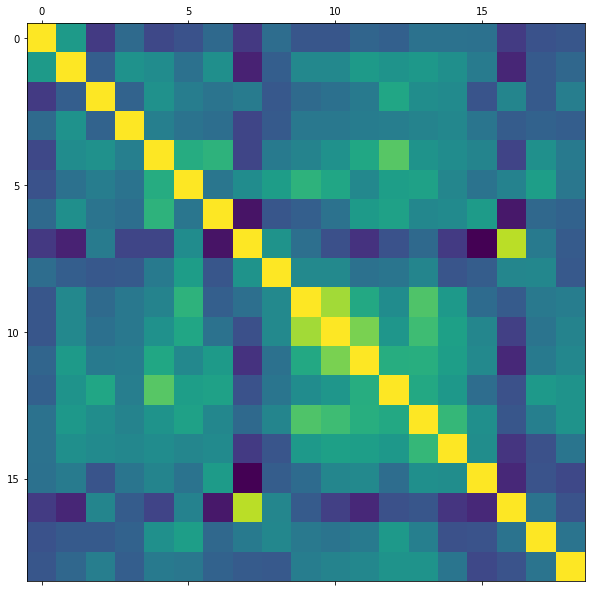

In [16]:
plt.matshow(z.corr()) #This plots the correlation matrix of the mineral concentrations

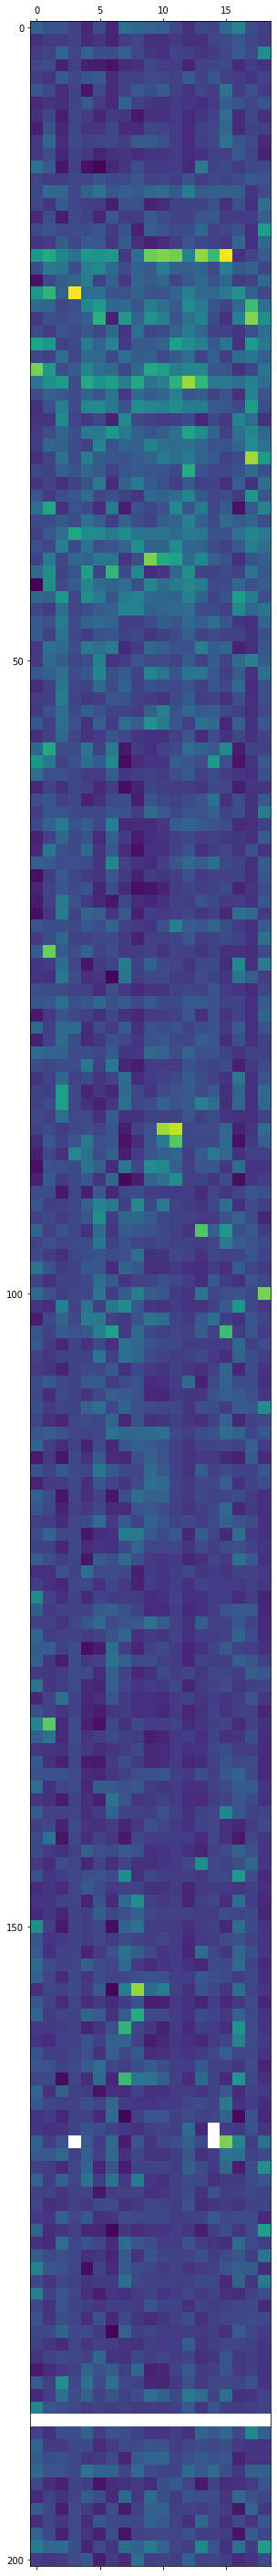

In [17]:
plt.figure(figsize=(5,50)) #This sets the figure size
plt.matshow(z,fignum=1) #This shows the graphic of the heatmap

In [18]:
f = pd.DataFrame(np.arange(4221).reshape(201,21)) #This means that all of the date on the right side of the equals sign is now denoted as f,pd dataframe means we are pulling the dataframe from the pandas library,the dot means we are choosing one function called dataframe fromthe library,np.arrange measn we are choosing the arrange function form the numpy library,we are analyzing (4221) data points from our csv file and reshaping them into 201 columns and 21 rows       
f = f.astype(str) #This coverts the data denoted as f into a new type called string
f[0] = data0[0] #This means that column zero in dataframe f is coulmn zero in dataframe zero
f[1] = data0[1] #This means that column one in dataframe f is column one in dataframe zero
for x in range(2,(z.shape[1])+2): #Counts through columns
    f[x] = z[x] #This means that every column in f equals every column in z,this is the operation where we are adding abck the two columns that were dropped back at the beginning 
f

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,318684.0,1.0,0.692703,0.168027,0.152836,-0.288678,-1.095365,-0.020884,-1.143003,1.152545,...,0.750634,0.620880,-0.230813,-0.791538,-0.143229,-0.387373,1.025765,1.937641,0.040497,-0.377792
1,588141.0,1.0,-0.827667,-0.606275,-0.523758,-0.290109,-0.950379,-0.690758,-1.223028,-0.486785,...,-0.831531,-0.802292,-0.556175,-0.913118,-0.857729,-0.219521,-0.050295,0.351722,-0.238037,-0.520947
2,588646.0,1.0,-0.570128,-0.267203,0.860643,-0.236229,0.684828,0.048733,-0.019548,0.607897,...,-0.647862,-0.873699,-0.289340,-0.391134,-0.746648,-0.509223,-0.177273,0.474729,0.009420,2.368583
3,588378.0,1.0,-0.165959,0.030816,-1.260347,-0.332969,-1.340899,-1.427680,-1.690195,-1.020385,...,-0.182517,-0.485446,-0.564767,-1.187771,-0.376403,-0.217123,-0.123098,-1.034349,-0.557028,-0.827251
4,1583.0,1.0,-0.436770,-0.728947,0.467089,-0.169339,0.307751,0.440776,-0.979407,-0.360694,...,-0.100584,-0.164521,-0.317712,0.456289,-0.260382,0.329508,-0.323697,-0.523073,-0.753630,-0.282677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,483184.0,8.0,0.557100,-0.142297,-1.448198,0.007615,-0.603612,-1.162560,0.049623,-1.493862,...,0.606472,0.733198,-0.393828,-0.293745,-0.429965,-0.137081,-0.559680,-1.578883,0.773274,-0.650069
197,483190.0,8.0,-0.884313,-0.314623,-0.699495,-0.056212,-0.965704,0.331843,-0.161853,-0.201515,...,0.723153,0.422013,-0.273255,-0.869014,0.928448,-0.239090,-0.855539,-0.186144,-0.778948,0.392007
198,483188.0,8.0,0.757204,-0.201087,-1.322406,-0.113024,-0.732842,-1.263402,0.050252,-1.650784,...,-0.223849,-0.219781,-0.197577,0.103511,-0.469201,-0.406966,-0.546216,-1.663374,0.422181,-0.230117
199,483187.0,8.0,1.637992,0.923608,1.066253,0.072003,-1.155246,-0.104672,-0.715301,1.130958,...,1.581965,0.841633,-0.216884,-0.473968,2.070200,0.296275,-0.792602,1.312367,-0.569446,2.995776


In [19]:
f.to_csv('New_ionStats_removed_Y.csv',header = ('INVO','Spec_int','B11','Na23','Mg26','Al27','P31','S34','K39','Ca44','Fe54','Mn55','Co59','Ni60','Cu63',
                                      'Zn66','As75','Rb85','Sr88','Mo98','Cd111'))